#### Recreate Figure 5 in Gandhi, P. J., et al. (2022)

@author: Pratik Gandhi <pjgandhi@ucdavis.edu>

In [1]:
# importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import ascii
import glob

In [2]:
# specific matplotlib settings from my matplotlibrc file
plt.rcParams['legend.frameon'] = False
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['figure.figsize'] = (8, 7.5)
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.variant'] = 'normal'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.stretch'] = 'normal'
plt.rcParams['font.size'] = 25.0
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['axes.labelsize'] = 25.0
plt.rcParams['axes.labelpad'] = 6.0
plt.rcParams['axes.titlepad'] = 0.0
plt.rcParams['axes.titlesize'] = 25.0
plt.rcParams['axes.formatter.limits'] = -7,7
plt.rcParams['xtick.major.size'] = 15.0
plt.rcParams['ytick.major.size'] = 15.0
plt.rcParams['xtick.minor.size'] = 8.0
plt.rcParams['ytick.minor.size'] = 8.0
plt.rcParams['xtick.major.pad'] = 12.0
plt.rcParams['ytick.major.pad'] = 12.0
plt.rcParams['xtick.minor.pad'] = 12.0
plt.rcParams['ytick.minor.pad'] = 12.0
plt.rcParams['xtick.major.width'] = 1.6
plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['xtick.minor.width'] = 0.8
plt.rcParams['ytick.minor.width'] = 0.8
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.scatterpoints'] = 1
plt.rcParams['figure.constrained_layout.use'] = False

#### Handling i/o; reading in data points

In [3]:
# reading in asas-sn data with errors; modified to Baldry+12 SMF
asassn = ascii.read('../data/asassn_vollim_mod.txt')
asassn_mass = np.array(asassn['massBin'])
asassn_mass = np.power(10, asassn_mass)
asassn_rate = np.array(asassn['relRate'])
low_err = np.array(asassn['relRateErrLow'])
up_err = np.array(asassn['relRateErrUp'])

In [4]:
# reading in asas-sn upper limits; modified to Baldry+12 SMF
asassn_uplim = ascii.read('../data/asassn_vollim_mod_uplims.txt')
asassn_uplim_mass = np.array(asassn_uplim['massBin'])
asassn_uplim_mass = np.power(10, asassn_uplim_mass)
asassn_uplim_uperr = np.array(asassn_uplim['relRateErrUp'])
asassn_uplim_uplims = np.array(['1, 1, 1'], dtype='bool')
asassn_uplim_yerr = 17.5

In [5]:
# reading in OG FIRE-2 SNrates for various metallicity power laws (cap = 100x)
f_OG_100 = ['../data/maoz-solar_alpha0.0-cap100_norm10.txt', \
            '../data/maoz-solar_alpha0.5-cap100_norm10.txt', \
            '../data/maoz-solar_alpha1.0-cap100_norm10.txt']
f_OG_10 = ['../data/maoz-solar_alpha0.0-cap10_norm10.txt', \
           '../data/maoz-solar_alpha0.5-cap10_norm10.txt', \
           '../data/maoz-solar_alpha1.0-cap10_norm10.txt']
f_adj_100 = ['../data/maoz-adjustedSFH-B19_alpha0.0-cap100_norm10.txt', \
             '../data/maoz-adjustedSFH-B19_alpha0.5-cap100_norm10.txt', \
             '../data/maoz-adjustedSFH-B19_alpha1.0-cap100_norm10.txt']
f_adj_10 = ['../data/maoz-adjustedSFH-B19_alpha0.0-cap10_norm10.txt', \
            '../data/maoz-adjustedSFH-B19_alpha0.5-cap10_norm10.txt', \
            '../data/maoz-adjustedSFH-B19_alpha1.0-cap10_norm10.txt']

In [6]:
# reading in data points for full contours for spread in Ia rate values
rate_contours = ascii.read('../data/SNrates_contours_complete.txt')
rate_contour_mass = rate_contours['stellarMass']
rate_contour_low = rate_contours['low']
rate_contour_high = rate_contours['high']

In [7]:
# choosing colours for plotting
cmap = plt.cm.get_cmap('viridis')
colours = [cmap(0.0), cmap(0.5), cmap(1.0)]

# different metallicity dependence power law exponents
alpha = [0.0, 0.5, 1.0]

#### Plot 1: (top left) OG FIRE SFH's with 100x cap 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


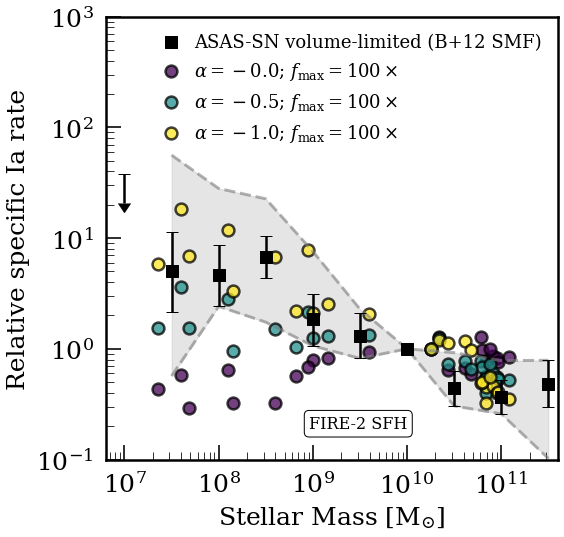

<Figure size 576x540 with 0 Axes>

In [8]:
# initialising figure
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(False)
fig.subplots_adjust(left=0.175, right=0.96, top=0.97, bottom=0.15, wspace=0)

# plotting asassn data points with error bars (normalised)
ax.scatter(asassn_mass, asassn_rate, marker='s', s=150, c='black', \
           label='ASAS-SN volume-limited (B+12 SMF)', zorder=10000)
ax.errorbar(asassn_mass, asassn_rate, yerr=(asassn_rate-low_err,up_err-asassn_rate), 
            fmt='none', ecolor='black', capsize=6.0, zorder=10000, label=None)

# plotting asassn upper limits
ax.errorbar(asassn_uplim_mass, asassn_uplim_uperr, yerr=asassn_uplim_yerr, 
            uplims=asassn_uplim_uplims, fmt='none', \
            ecolor='black', zorder=10000, capsize=6.0, label=None)

# plotting FIRE rates
for i in range(len(f_OG_100)):
        
    # reading in data
    data = ascii.read(f_OG_100[i])
    mass = data['stellarMass']
    specRate = data['specRate']
    normSpecRate = [0.0]*len(specRate)
    simID = data['simID']
    
    #plotting normalised rates for all sims for this value of alpha
    ax.scatter(mass, specRate, marker='o', s=140, c=colours[i], alpha=0.75, \
               edgecolors='k', linewidths=2.5, 
               label='$\\alpha=-'+str(alpha[i])+'$; $f_{\\rm max}=100\\times$')

# contours around largest spread in Ia rate values
ax.plot(rate_contour_mass, rate_contour_low, color='gray', alpha=0.6, lw=3, 
        linestyle='dashed', label=None)
ax.plot(rate_contour_mass, rate_contour_high, color='gray', alpha=0.6, lw=3, 
        linestyle='dashed', label=None)
ax.fill_between(rate_contour_mass, rate_contour_low, rate_contour_high, 
                color='gray', alpha=0.2, label=None, zorder=0.1)    

# adding annotation for rate cap
ax.text(0.45, 0.1, 'FIRE-2 SFH', transform=ax.transAxes, fontsize=16, \
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='none'))
    
# specifying rest of plot
ax.set_xlabel("Stellar Mass [$\\rm{M}_{\odot}$]")
ax.set_ylabel("Relative specific Ia rate")
ax.set_xlim(10**6.8, 10**11.6)
ax.set_ylim(10**-1, 10**3)
ax.legend(prop={'size':18}, loc='upper right', ncol=1)
ax.set_xscale('log')
ax.set_yscale('log')
#plt.savefig('/specify/your/desired/path/here.pdf')
plt.show()
plt.clf()

#### Plot 2: (top right) OG FIRE SFH's with 10x cap 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


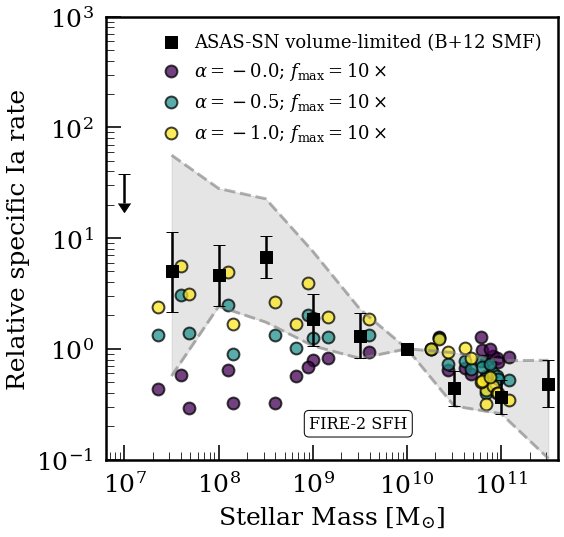

<Figure size 576x540 with 0 Axes>

In [9]:
# initialising figure
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(False)
fig.subplots_adjust(left=0.175, right=0.96, top=0.97, bottom=0.15, wspace=0)

# plotting asassn data points with error bars (normalised)
ax.scatter(asassn_mass, asassn_rate, marker='s', s=150, c='black', \
           label='ASAS-SN volume-limited (B+12 SMF)', zorder=10000)
ax.errorbar(asassn_mass, asassn_rate, yerr=(asassn_rate-low_err,up_err-asassn_rate), fmt='none', \
             ecolor='black', capsize=6.0, zorder=10000, label=None)

# plotting asassn upper limits
ax.errorbar(asassn_uplim_mass, asassn_uplim_uperr, yerr=asassn_uplim_yerr, 
            uplims=asassn_uplim_uplims, fmt='none', \
            ecolor='black', zorder=10000, capsize=6.0, label=None)

# plotting FIRE rates
for i in range(len(f_OG_10)):
    
    # reading in data
    data = ascii.read(f_OG_10[i])
    mass = data['stellarMass']
    specRate = data['specRate']
    normSpecRate = [0.0]*len(specRate)
    simID = data['simID']
    
    #plotting normalised rates for all sims for this value of alpha
    ax.scatter(mass, specRate, marker='o', s=140, c=colours[i], alpha=0.75, \
                edgecolors='k', linewidths=2, 
               label='$\\alpha=-'+str(alpha[i])+'$; $f_{\\rm max}=10\\times$')

# contours around largest spread in Ia rate values
ax.plot(rate_contour_mass, rate_contour_low, color='gray', alpha=0.6, lw=3, 
        linestyle='dashed', label=None)
ax.plot(rate_contour_mass, rate_contour_high, color='gray', alpha=0.6, lw=3, 
        linestyle='dashed', label=None)
ax.fill_between(rate_contour_mass, rate_contour_low, rate_contour_high, 
                color='gray', alpha=0.2, label=None, zorder=0.1)
    
# adding annotation for rate cap
ax.text(0.45, 0.1, 'FIRE-2 SFH', transform=ax.transAxes, fontsize=16, \
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='none'))
    
# specifying rest of plot
ax.set_xlabel("Stellar Mass [$\\rm{M}_{\odot}$]")
ax.set_ylabel("Relative specific Ia rate")
ax.set_xlim(10**6.8, 10**11.6)
ax.set_ylim(10**-1, 10**3)
ax.legend(prop={'size':18}, loc='upper right', ncol=1)
ax.set_xscale('log')
ax.set_yscale('log')
#plt.savefig('/specify/your/desired/path/here.pdf')
plt.show()
plt.clf()

#### Plot 3: (bottom left) B19 SFH's with 100x cap 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


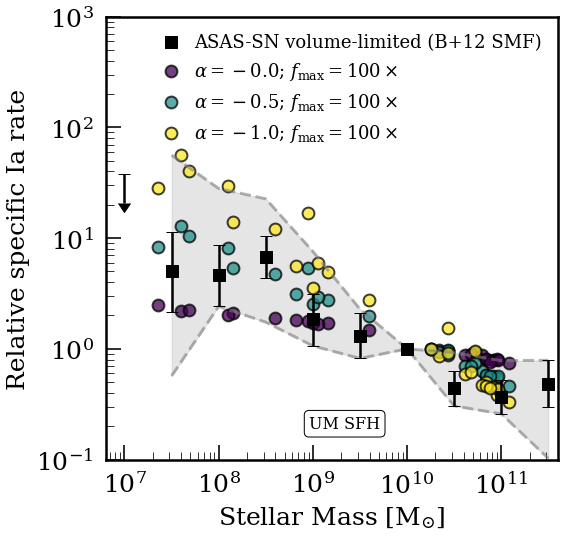

<Figure size 576x540 with 0 Axes>

In [10]:
# initialising figure
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(False)
fig.subplots_adjust(left=0.175, right=0.96, top=0.97, bottom=0.15, wspace=0)

# plotting asassn data points with error bars (normalised)
ax.scatter(asassn_mass, asassn_rate, marker='s', s=150, c='black', \
           label='ASAS-SN volume-limited (B+12 SMF)', zorder=10000)
ax.errorbar(asassn_mass, asassn_rate, yerr=(asassn_rate-low_err,up_err-asassn_rate), fmt='none', \
             ecolor='black', capsize=6.0, zorder=10000, label=None)

# plotting asassn upper limits
ax.errorbar(asassn_uplim_mass, asassn_uplim_uperr, yerr=asassn_uplim_yerr, 
            uplims=asassn_uplim_uplims, fmt='none', \
            ecolor='black', zorder=10000, capsize=6.0, label=None)

# plotting FIRE rates
for i in range(len(f_adj_100)):
    
    # reading in data
    data = ascii.read(f_adj_100[i])
    mass = data['stellarMass']
    specRate = data['specRate']
    normSpecRate = [0.0]*len(specRate)
    simID = data['simID']
    
    #plotting normalised rates for all sims for this value of alpha
    ax.scatter(mass, specRate, marker='o', s=140, c=colours[i], alpha=0.75, \
                edgecolors='k', linewidths=2, 
               label='$\\alpha=-'+str(alpha[i])+'$; $f_{\\rm max}=100\\times$')

# contours around largest spread in Ia rate values
ax.plot(rate_contour_mass, rate_contour_low, color='gray', alpha=0.6, lw=3, 
        linestyle='dashed', label=None)
ax.plot(rate_contour_mass, rate_contour_high, color='gray', alpha=0.6, lw=3, 
        linestyle='dashed', label=None)
ax.fill_between(rate_contour_mass, rate_contour_low, rate_contour_high, 
                color='gray', alpha=0.2, label=None, zorder=0.1)
    
# adding annotation for rate cap
ax.text(0.45, 0.1, 'UM SFH', transform=ax.transAxes, fontsize=16, \
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='none'))
    
# specifying rest of plot
ax.set_xlabel("Stellar Mass [$\\rm{M}_{\odot}$]")
ax.set_ylabel("Relative specific Ia rate")
ax.set_xlim(10**6.8, 10**11.6)
ax.set_ylim(10**-1, 10**3)
ax.legend(prop={'size':18}, loc='upper right', ncol=1)
ax.set_xscale('log')
ax.set_yscale('log')
#plt.savefig('/specify/your/desired/path/here.pdf')
plt.show()
plt.clf()

#### Plot 4: (bottom right) B19 SFH's with 10x cap 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


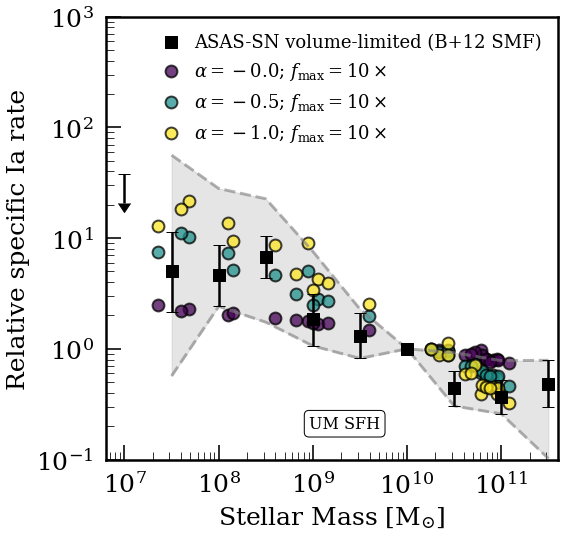

<Figure size 576x540 with 0 Axes>

In [11]:
# initialising figure
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(False)
fig.subplots_adjust(left=0.175, right=0.96, top=0.97, bottom=0.15, wspace=0)

# plotting asassn data points with error bars (normalised)
ax.scatter(asassn_mass, asassn_rate, marker='s', s=150, c='black', \
           label='ASAS-SN volume-limited (B+12 SMF)', zorder=10000)
ax.errorbar(asassn_mass, asassn_rate, yerr=(asassn_rate-low_err,up_err-asassn_rate), fmt='none', \
             ecolor='black', capsize=6.0, zorder=10000, label=None)

# plotting asassn upper limits
ax.errorbar(asassn_uplim_mass, asassn_uplim_uperr, yerr=asassn_uplim_yerr, 
            uplims=asassn_uplim_uplims, fmt='none', \
            ecolor='black', zorder=10000, capsize=6.0, label=None)

# plotting FIRE rates
for i in range(len(f_adj_10)):
    
    # reading in data
    data = ascii.read(f_adj_10[i])
    mass = data['stellarMass']
    specRate = data['specRate']
    normSpecRate = [0.0]*len(specRate)
    simID = data['simID']
    
    #plotting normalised rates for all sims for this value of alpha
    ax.scatter(mass, specRate, marker='o', s=140, c=colours[i], alpha=0.75, \
                edgecolors='k', linewidths=2, 
               label='$\\alpha=-'+str(alpha[i])+'$; $f_{\\rm max}=10\\times$')

# contours around largest spread in Ia rate values
ax.plot(rate_contour_mass, rate_contour_low, color='gray', alpha=0.6, lw=3, 
        linestyle='dashed', label=None)
ax.plot(rate_contour_mass, rate_contour_high, color='gray', alpha=0.6, lw=3, 
        linestyle='dashed', label=None)
ax.fill_between(rate_contour_mass, rate_contour_low, rate_contour_high, 
                color='gray', alpha=0.2, label=None, zorder=0.1)
    
# adding annotation for rate cap
ax.text(0.45, 0.1, 'UM SFH', transform=ax.transAxes, fontsize=16, \
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='none'))
    
# specifying rest of plot
ax.set_xlabel("Stellar Mass [$\\rm{M}_{\odot}$]")
ax.set_ylabel("Relative specific Ia rate")
ax.set_xlim(10**6.8, 10**11.6)
ax.set_ylim(10**-1, 10**3)
ax.legend(prop={'size':18}, loc='upper right', ncol=1)
ax.set_xscale('log')
ax.set_yscale('log')
#plt.savefig('/specify/your/desired/path/here.pdf')
plt.show()
plt.clf()